In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV

In [17]:
df = pd.read_excel('heart_disease.xlsx', sheet_name = 'Heart_disease')

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       13 non-null     object
 1   1       13 non-null     object
dtypes: object(2)
memory usage: 336.0+ bytes
None


In [5]:
print(df.describe())

          0             1
count    13            13
unique   13            13
top     age  Age in years
freq      1             1


In [36]:
df.shape

(908, 13)

In [37]:
df.size

11804

In [38]:
df.ndim

2

In [39]:
df.duplicated().any()

True

In [40]:
df.drop_duplicates(inplace = True)

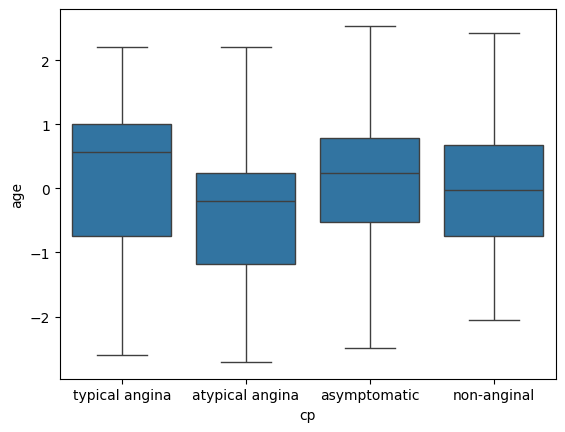

In [41]:
sns.boxplot(data=df, x='cp', y='age')
plt.show()

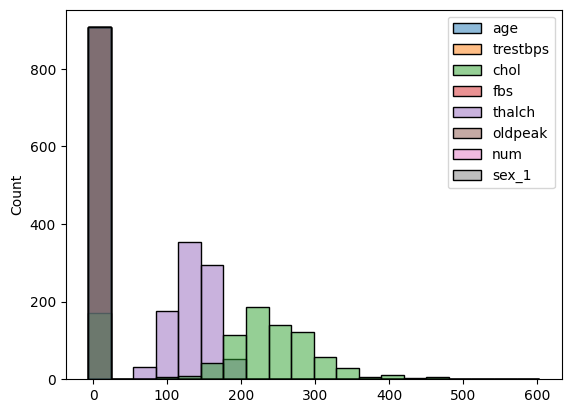

In [42]:
sns.histplot(df,bins=20)
plt.show()

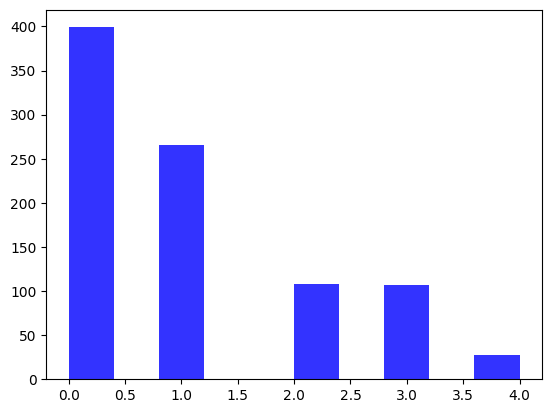

In [43]:
plt.hist(df['num'],bins = 10, color='blue',alpha=0.8)
plt.show()

<Axes: xlabel='fbs'>

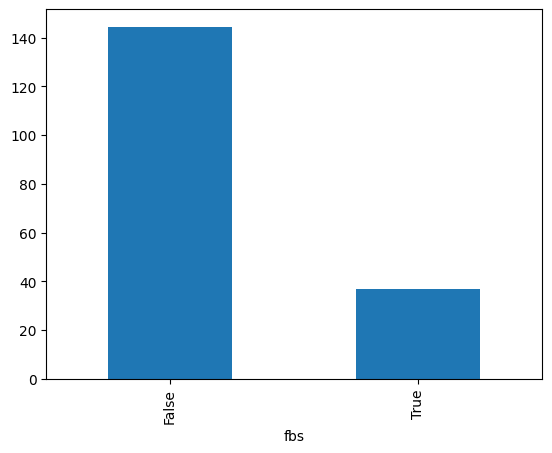

In [44]:
pd.crosstab(df['num'],df['fbs']).mean().plot(kind='bar')

<Axes: xlabel='num'>

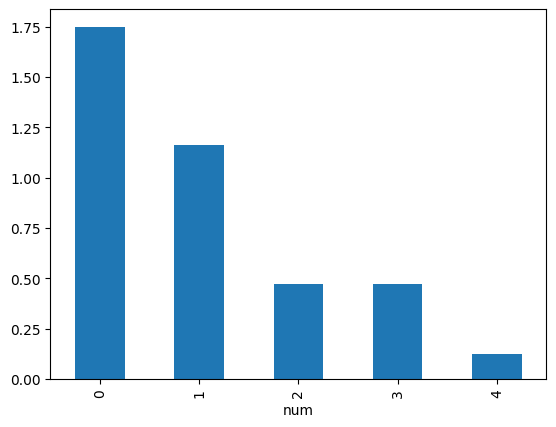

In [45]:
pd.crosstab(df['chol'],df['num']).mean().plot(kind='bar')

<Axes: xlabel='cp'>

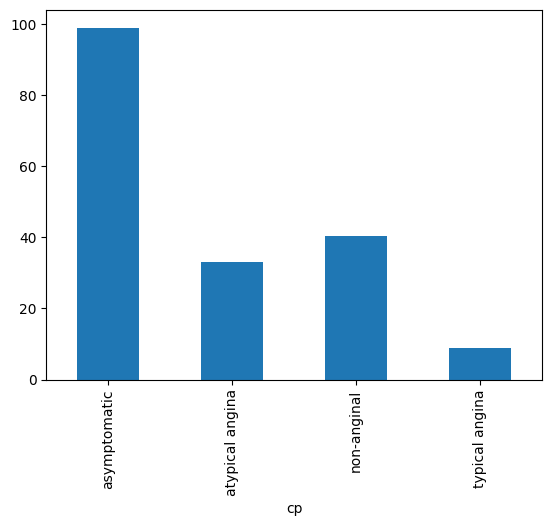

In [46]:
pd.crosstab(df['num'],df['cp']).mean().plot(kind='bar')

In [48]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df["cp"]=label_encoder.fit_transform(df["cp"])
df["restecg"]=label_encoder.fit_transform(df["restecg"])
df["slope"]=label_encoder.fit_transform(df["slope"])
df["thal"]=label_encoder.fit_transform(df["thal"])
df["fbs"]=label_encoder.fit_transform(df["fbs"])
df

,age,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num,sex_1
0,1.006027,3,0.567394,233,1,0,150,False,2.3,0,0,0,True
1,-1.397560,1,0.076967,203,0,1,132,False,0.0,1,0,0,True
2,0.350503,0,0.322181,192,0,1,148,False,0.4,1,0,0,True
3,-0.195767,3,-0.756760,186,0,0,190,False,0.0,1,0,0,True
4,0.350503,0,-1.149102,201,0,1,126,True,1.5,1,0,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,-0.086513,0,-0.413461,0,0,1,120,False,1.5,2,2,4,True
904,0.896773,0,1.597292,170,0,2,120,True,3.0,1,2,4,True
905,0.241249,2,1.793463,0,0,0,123,True,2.5,0,1,4,True
906,0.241249,2,0.518352,208,1,2,105,TURE,0.5,0,0,4,True


In [50]:
df['sex_1'] = df['sex_1'].map({'Male':0,'Female':1})
df

,age,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num,sex_1
0,1.006027,3,0.567394,233,1,0,150,False,2.3,0,0,0,NaN
1,-1.397560,1,0.076967,203,0,1,132,False,0.0,1,0,0,NaN
2,0.350503,0,0.322181,192,0,1,148,False,0.4,1,0,0,NaN
3,-0.195767,3,-0.756760,186,0,0,190,False,0.0,1,0,0,NaN
4,0.350503,0,-1.149102,201,0,1,126,True,1.5,1,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,-0.086513,0,-0.413461,0,0,1,120,False,1.5,2,2,4,NaN
904,0.896773,0,1.597292,170,0,2,120,True,3.0,1,2,4,NaN
905,0.241249,2,1.793463,0,0,0,123,True,2.5,0,1,4,NaN
906,0.241249,2,0.518352,208,1,2,105,TURE,0.5,0,0,4,NaN


In [51]:
df=df.drop('exang',axis=1)

<Axes: >

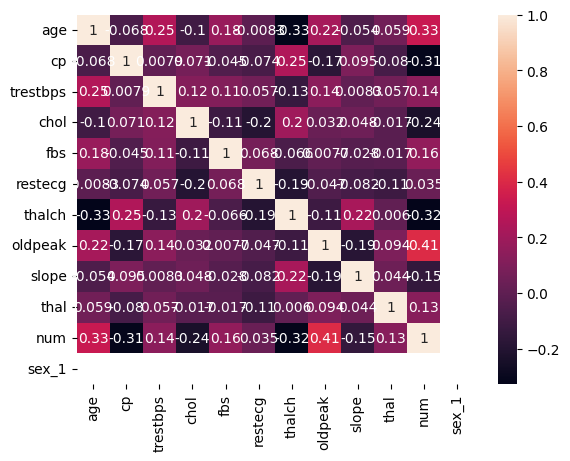

In [52]:
sns.heatmap(df.corr(),annot=True)

In [55]:
target=df[['num']]
feature=df.drop('num',axis=1)
target
feature

,age,cp,trestbps,chol,fbs,restecg,thalch,oldpeak,slope,thal,sex_1
0,1.006027,3,0.567394,233,1,0,150,2.3,0,0,NaN
1,-1.397560,1,0.076967,203,0,1,132,0.0,1,0,NaN
2,0.350503,0,0.322181,192,0,1,148,0.4,1,0,NaN
3,-0.195767,3,-0.756760,186,0,0,190,0.0,1,0,NaN
4,0.350503,0,-1.149102,201,0,1,126,1.5,1,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
903,-0.086513,0,-0.413461,0,0,1,120,1.5,2,2,NaN
904,0.896773,0,1.597292,170,0,2,120,3.0,1,2,NaN
905,0.241249,2,1.793463,0,0,0,123,2.5,0,1,NaN
906,0.241249,2,0.518352,208,1,2,105,0.5,0,0,NaN


In [56]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
x_train,x_test,y_train,y_test = train_test_split(feature,target,train_size=0.80,random_state=100)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(725, 11)
(182, 11)
(725, 1)
(182, 1)


In [57]:
from sklearn.impute import SimpleImputer
sim_imp= SimpleImputer(missing_values=np.nan,strategy='mean')
x_train = sim_imp.fit_transform(x_train)
y_train = sim_imp.fit_transform(y_train)
x_test = sim_imp.fit_transform(x_test)
y_test = sim_imp.fit_transform(y_test)
dec_tree = DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=3)
dec_tree.fit(x_train,y_train)
y_pred= dec_tree.predict(x_test)
accuracy_score(y_test,y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: ['sex_1']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: ['sex_1']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


0.5274725274725275

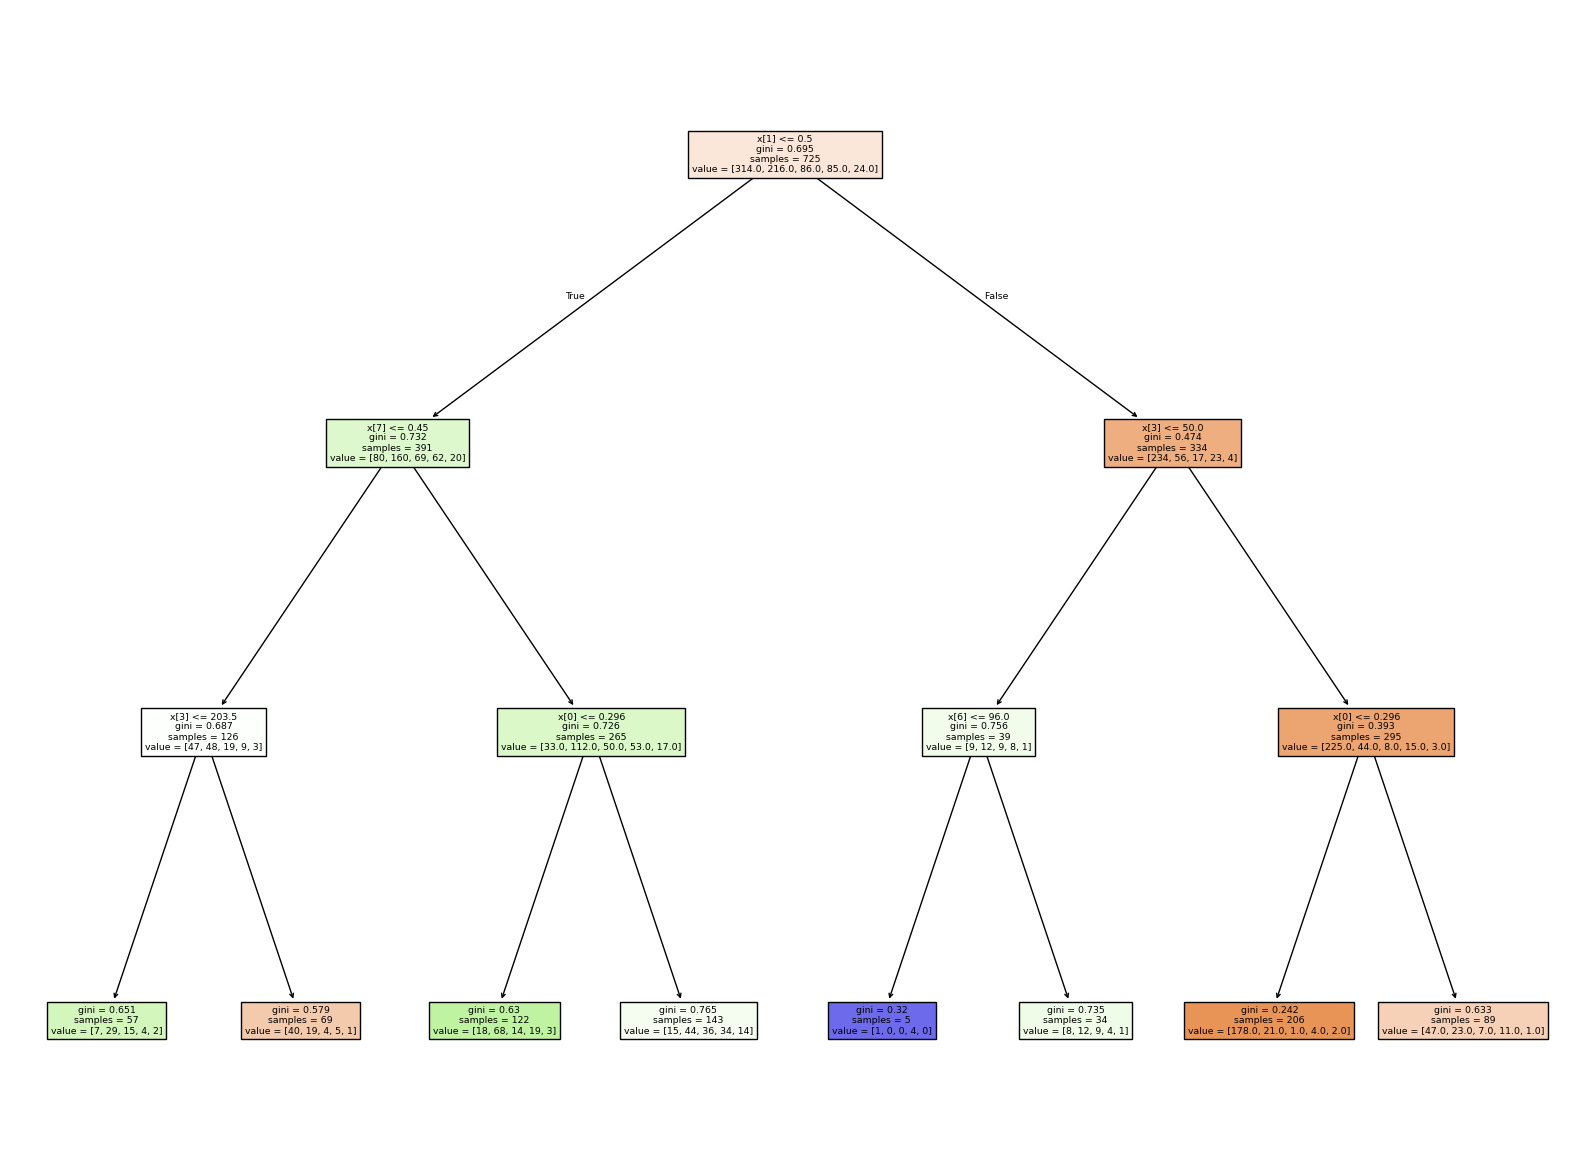

In [58]:
plt.figure(figsize=(20,15))
plot_tree(dec_tree,filled=True,max_depth=3)
plt.show()

In [59]:
params = {'criterion': ['gini', 'entropy'],'splitter': ['best', 'random'],'max_depth': [1, 2, 3, 4, 5]}

In [60]:
grid_search = GridSearchCV(dec_tree,params)
grid_search.fit(x_train,y_train)
grid_search.best_params_




{'criterion': 'gini', 'max_depth': 4, 'splitter': 'best'}

In [61]:
dec_tree = DecisionTreeClassifier(criterion='entropy',splitter='best',max_depth=5)
dec_tree.fit(x_train,y_train)
y_pred = dec_tree.predict(x_test)
accuracy_score(y_test,y_pred)


0.5494505494505495

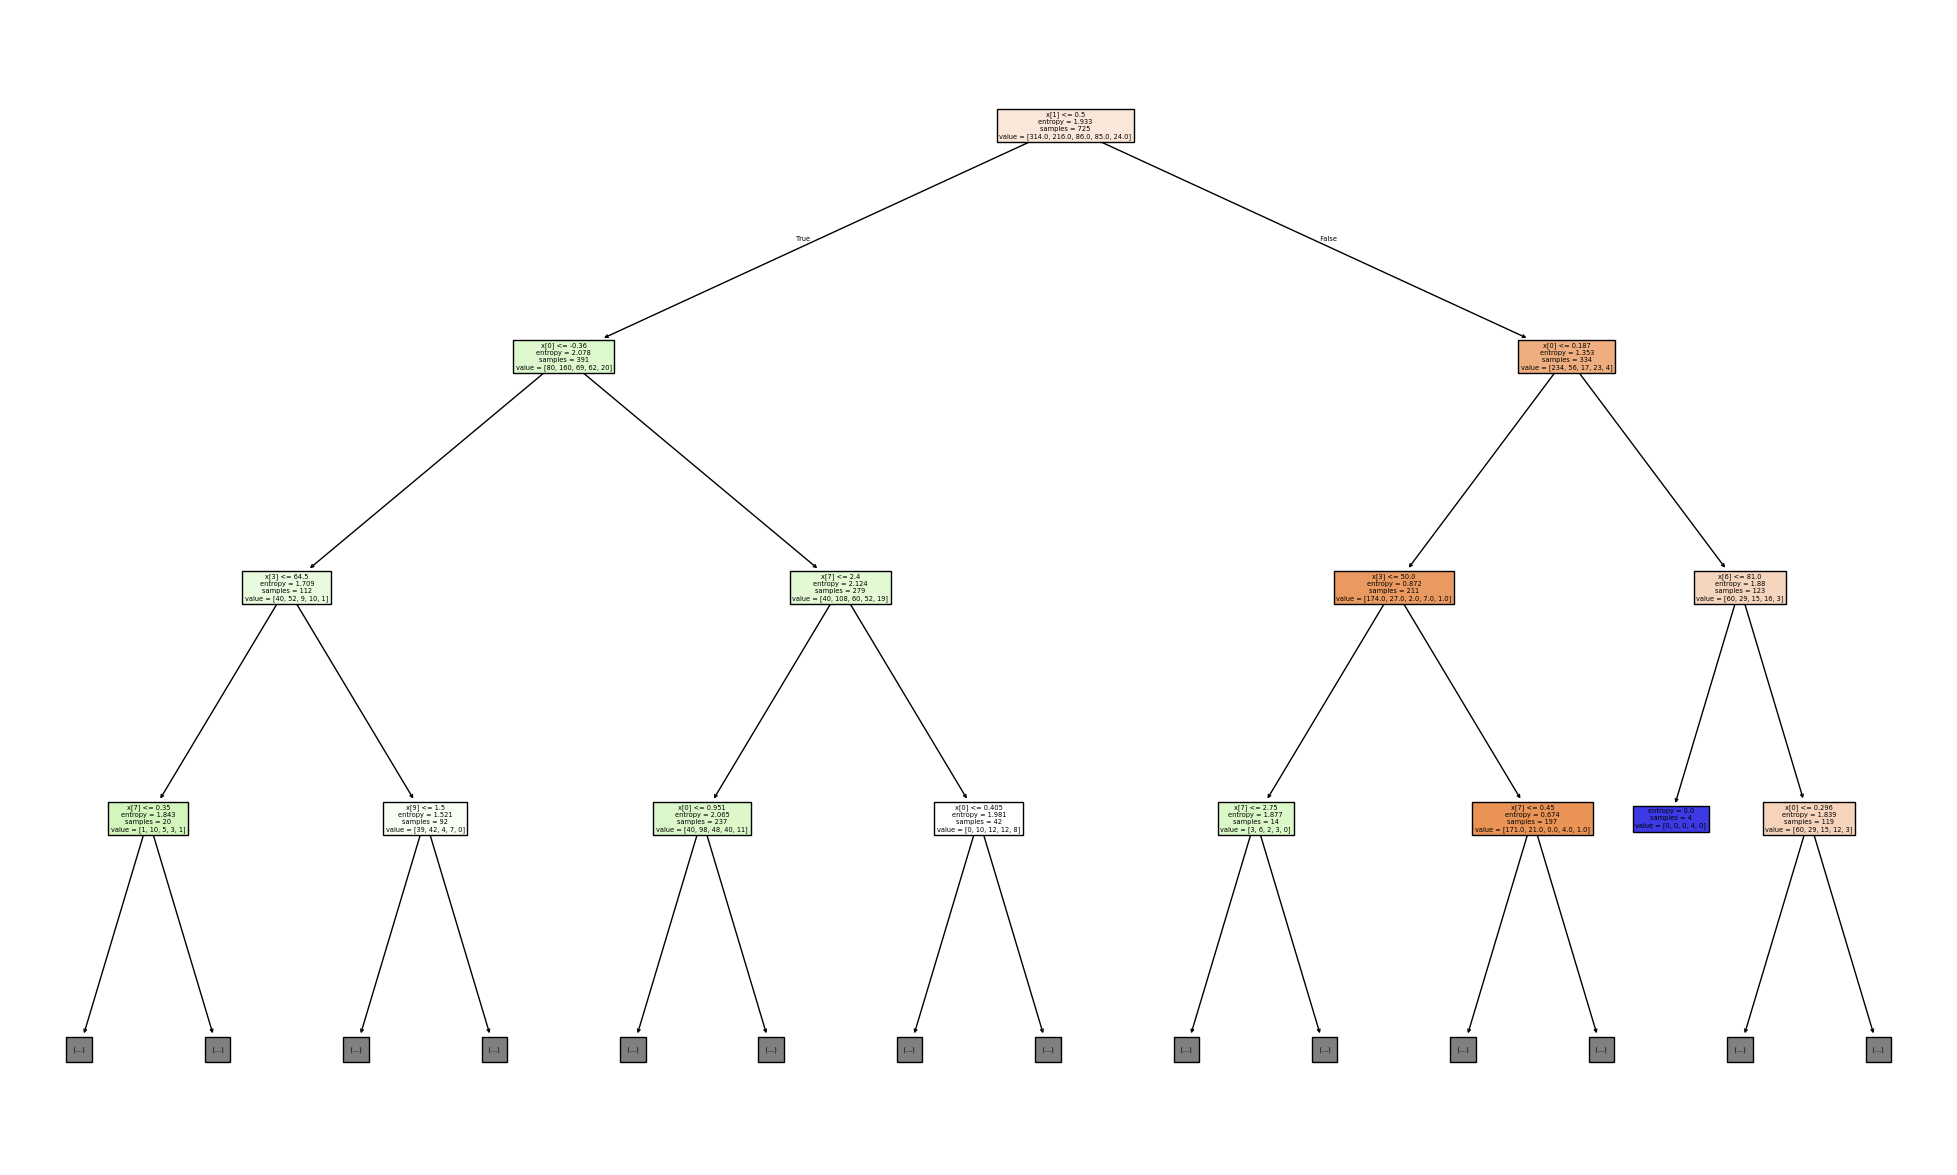

In [62]:
plt.figure(figsize=(25,15))
plot_tree(dec_tree,filled=True,max_depth=3)
plt.show()

In [63]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.78      0.75      0.77        85
         1.0       0.37      0.51      0.43        49
         2.0       0.50      0.23      0.31        22
         3.0       0.29      0.27      0.28        22
         4.0       0.00      0.00      0.00         4

    accuracy                           0.55       182
   macro avg       0.39      0.35      0.36       182
weighted avg       0.56      0.55      0.55       182



In [64]:
confusion_matrix(y_test,y_pred)

array([[64, 17,  1,  3,  0],
       [16, 25,  0,  7,  1],
       [ 1, 12,  5,  4,  0],
       [ 1, 13,  1,  6,  1],
       [ 0,  0,  3,  1,  0]])

<Axes: >

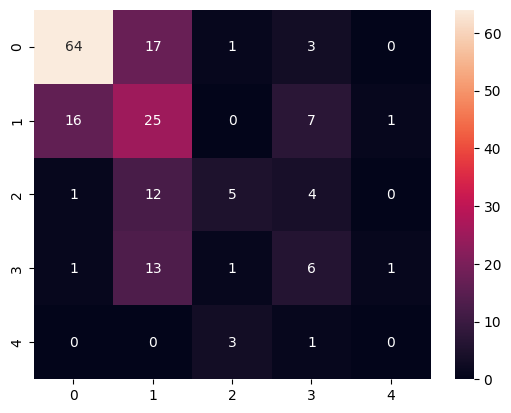

In [65]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

'''
Interview Questions:

1.What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

2.What is the difference between the Label encoding and One-hot encoding?

Answer1 :

The Decision Tree have several parameter but the main hyperparameter that effect the most are 'criterion','splitter' and 'max_depth',in samples split '

Criterion is used to make a choice between Gini and Entropy.

Splitter is used to make a choice between Best and Random.

Max_depth is used to give the deepth to the tree.

This specifies the minimum number of samples required to split an internal node

Answer2:

Label Encoder is a technique that is used to assign each category into a integer. The Label Encoder is prefered over the ordinal data.

One Hot Encoder is a technique where each category is represented as a binary. The OneHot Encoder is prefered over the nominal data.
